# Load Data

In [1]:
import sys
import os
searchPath=os.path.abspath('..')  # '../..' 代表添加当前路径的上两级目录；这种方法是运行时修改，脚本运行后就会失效
sys.path.append(searchPath)
from cong import *
import pandas as pd
import numpy as np

%matplotlib inline

# 调整增加输出窗口显示数据
np.set_printoptions(precision=4, threshold=8, edgeitems=4, linewidth=75, suppress=True, nanstr='nan', infstr='inf')
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

# load data
root = 'D:/storage_hot/data/kaggle dataset/Wind Turbine/Wind Turbine Scada Dataset/archive/'
file = 'T1.csv'
data = pd.read_csv(root + file, index_col=False)  # encoding='GB18030'识别汉字表头；index_col=False 使得pandas不用第一列做索引（行名）
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [2]:
# rename columes
data.columns = ['Date', 'Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir']

In [3]:
# Data description
data.describe()

,Active-Power(kW),Wind-Speed(m/s),Theoretical-P(kW),Wind-Dir
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [4]:
data.shape

(50530, 5)

# Visualize

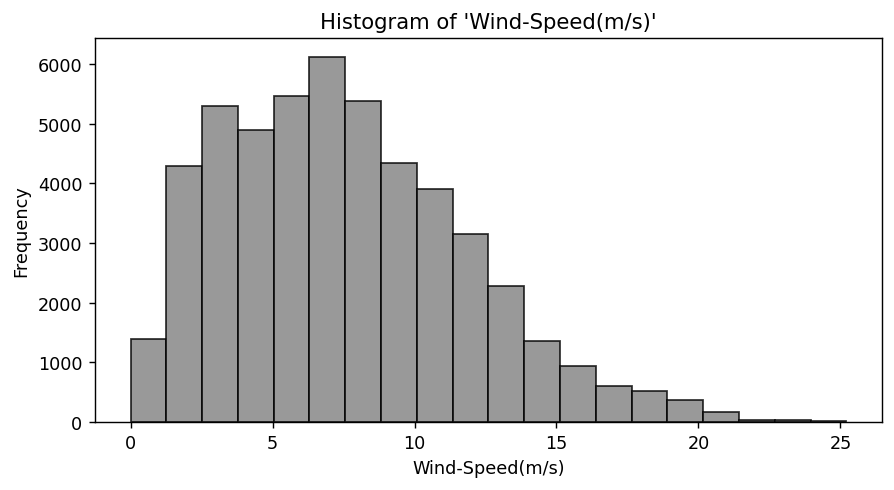

In [5]:
# 风速分布直方图
def plot_histogram(x):
    plt.figure(figsize=(8, 4),dpi=127)
    plt.hist(x, bins = 20, alpha=0.8, color = 'gray', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("{var_name}".format(var_name=x.name))
    plt.ylabel("Frequency")
    plt.rcParams['xtick.direction'] = 'in'  # 设置xtick和ytick的方向：in、out、inout
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.major.width'] = '0'  # 刻度值标记点宽度
    
plot_histogram(data['Wind-Speed(m/s)'])

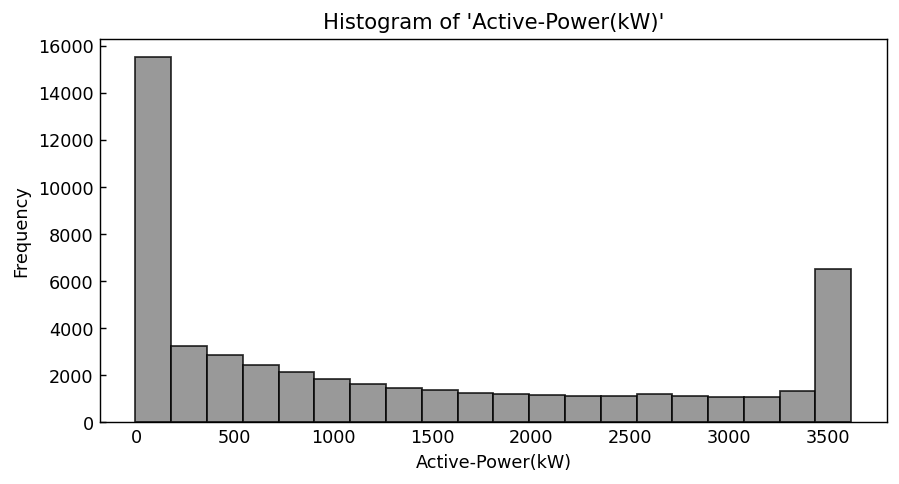

In [8]:
# 风力机组输出功率分布直方图
def plot_histogram(x):
    plt.figure(figsize=(8, 4),dpi=127)
    plt.hist(x, bins = 20, alpha=0.8, color = 'gray', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("{var_name}".format(var_name=x.name))
    plt.ylabel("Frequency")
    plt.rcParams['xtick.direction'] = 'in'  # 设置xtick和ytick的方向：in、out、inout
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.major.width'] = '0'

plot_histogram(data['Active-Power(kW)'])

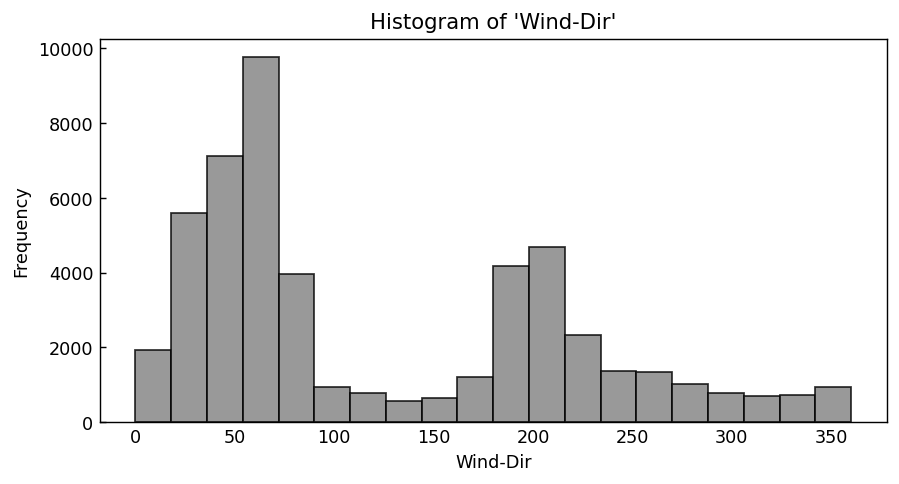

In [9]:
# 风向分布直方图
def plot_histogram(x):
    plt.figure(figsize=(8, 4),dpi=127)
    plt.hist(x, bins = 20, alpha=0.8, color = 'gray', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("{var_name}".format(var_name=x.name))
    plt.ylabel("Frequency")
    plt.rcParams['xtick.direction'] = 'in'  # 设置xtick和ytick的方向：in、out、inout
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.major.width'] = '0'

plot_histogram(data['Wind-Dir'])

In [63]:
import matplotlib
# 将配置重置为默认值
matplotlib.rcdefaults()

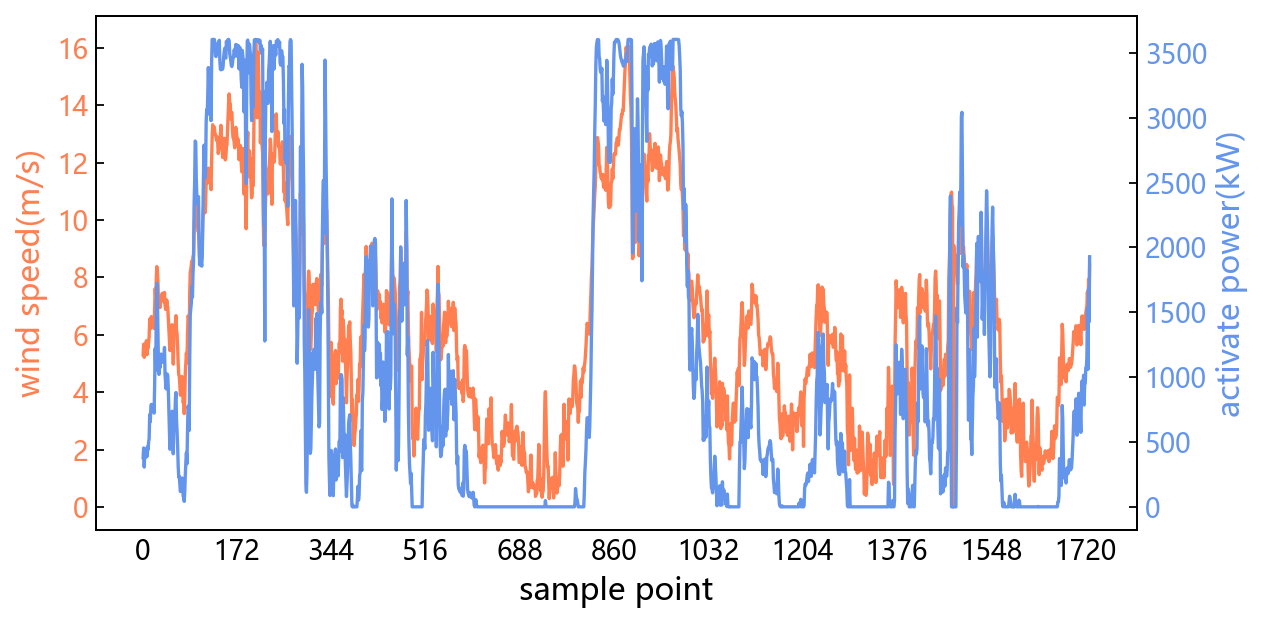

In [10]:
# 风速和输出功率可视化
plot_twin(data['Wind-Speed(m/s)'], data['Active-Power(kW)'], 1, 6*24*12, xlab='sample point', ylab1='wind speed(m/s)', ylab2='activate power(kW)')

# 相关系数矩阵

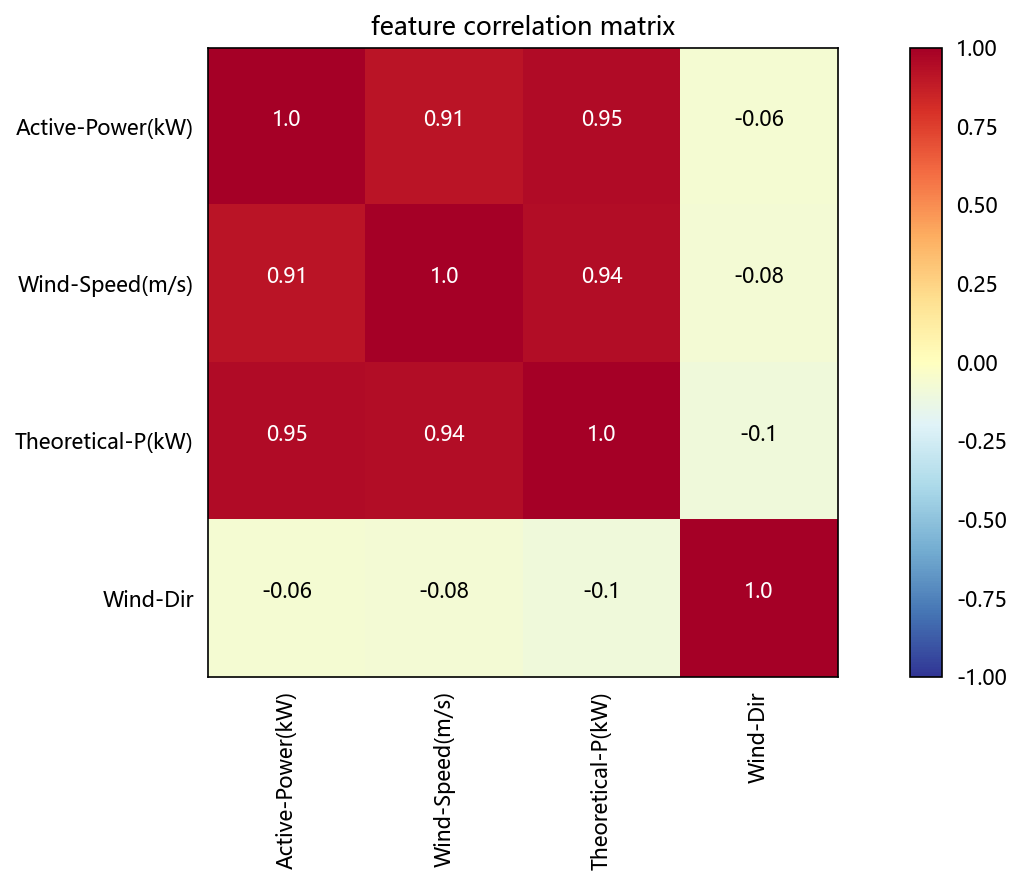

In [12]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

def pic_heatmap(data):
    X = StandardScaler().fit_transform(data.values)  # 数据标准化
    feature_names = list(data.columns)  # 获取变量名列表
    plt.figure(figsize=(10, 6),dpi=150)  # 创建画板设置比例像素
    ax = plt.axes()
    im = ax.imshow(np.corrcoef(X.T), cmap="RdYlBu_r", vmin=-1, vmax=1)  # 计算相关系数矩阵
    ax.set_xticks(np.array(range(0,len(feature_names))))  # 设置 x 轴坐标点刻度数量
    ax.set_xticklabels(list(feature_names), rotation=90)  # 设置 x 轴坐标点刻度标签、及其旋转角度
    ax.set_yticks(np.array(range(0,len(feature_names))))  # 设置 y 轴坐标点刻度数量
    ax.set_yticklabels(list(feature_names))  # 设置 y 轴坐标点刻度标签
    plt.rcParams['xtick.direction'] = 'out'  # 设置xtick和ytick的方向：in、out、inout
    plt.rcParams['ytick.direction'] = 'out'
    plt.rcParams['xtick.major.width'] = '0'
    plt.rcParams['ytick.major.width'] = '0'
    for i in np.array(range(X.shape[1])):  # 行
        for j in np.array(range(X.shape[1])):  # 列
            plt.text(j, i, round(np.corrcoef(X.T)[i,j],2),
                     horizontalalignment="center",
                     color="white" if abs(np.corrcoef(X.T)[i,j]) > 0.5 else "black")  # 列，行， 值
    plt.colorbar(im).ax.set_ylabel("", rotation=0)  # 设置比色卡位置、标签、标签角度 "$r$"
    ax.set_title("feature correlation matrix")
    plt.tight_layout()
    
    
pic_heatmap(data.loc[:,['Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir']])


# scatter_matrix

In [19]:
data_=data[:10000]
data_.shape

(10000, 5)

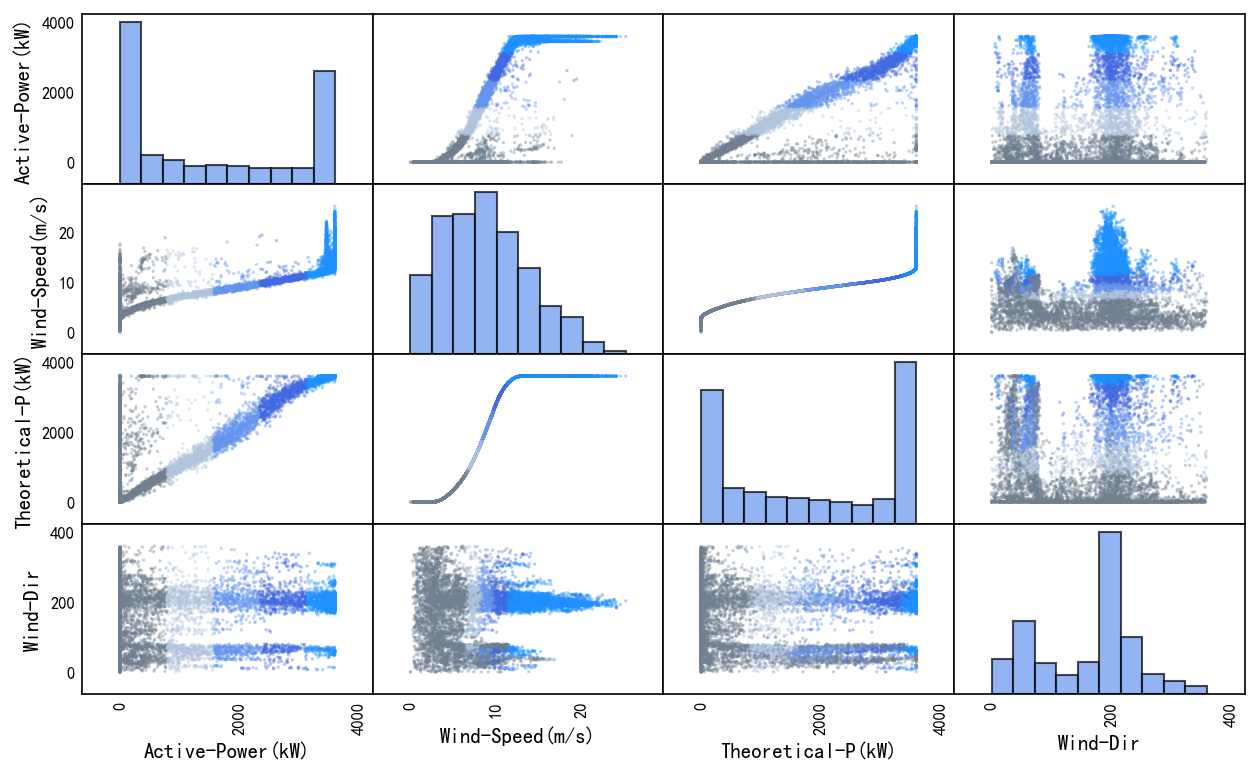

In [25]:
# 散布矩阵和相关性分析
colors=['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'dodgerblue']
pd.plotting.scatter_matrix(data_.loc[:,['Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir']],
                           alpha=0.4, figsize=(10,6), s=10,
                           diagonal='hist', hist_kwds={'color': 'cornflowerblue', 'edgecolor': 'black', 'alpha': 0.7},
                           range_padding=0.35, color=data_['Active-Power(kW)'].apply(lambda x : colors[int(x/780)])
                          )  # color=data1['I'].apply(lambda x : colors[x]);;;colors[4]
plt.rcParams['savefig.dpi'] = 200  # 图片像素
plt.rcParams['figure.dpi'] = 150  # 分辨率
plt.rcParams['xtick.direction'] = 'in'  # 设置xtick和ytick的方向：in、out、inout
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.labelpad'] = 4  # 轴标签和轴的距离：默认4.0
plt.show()
                           

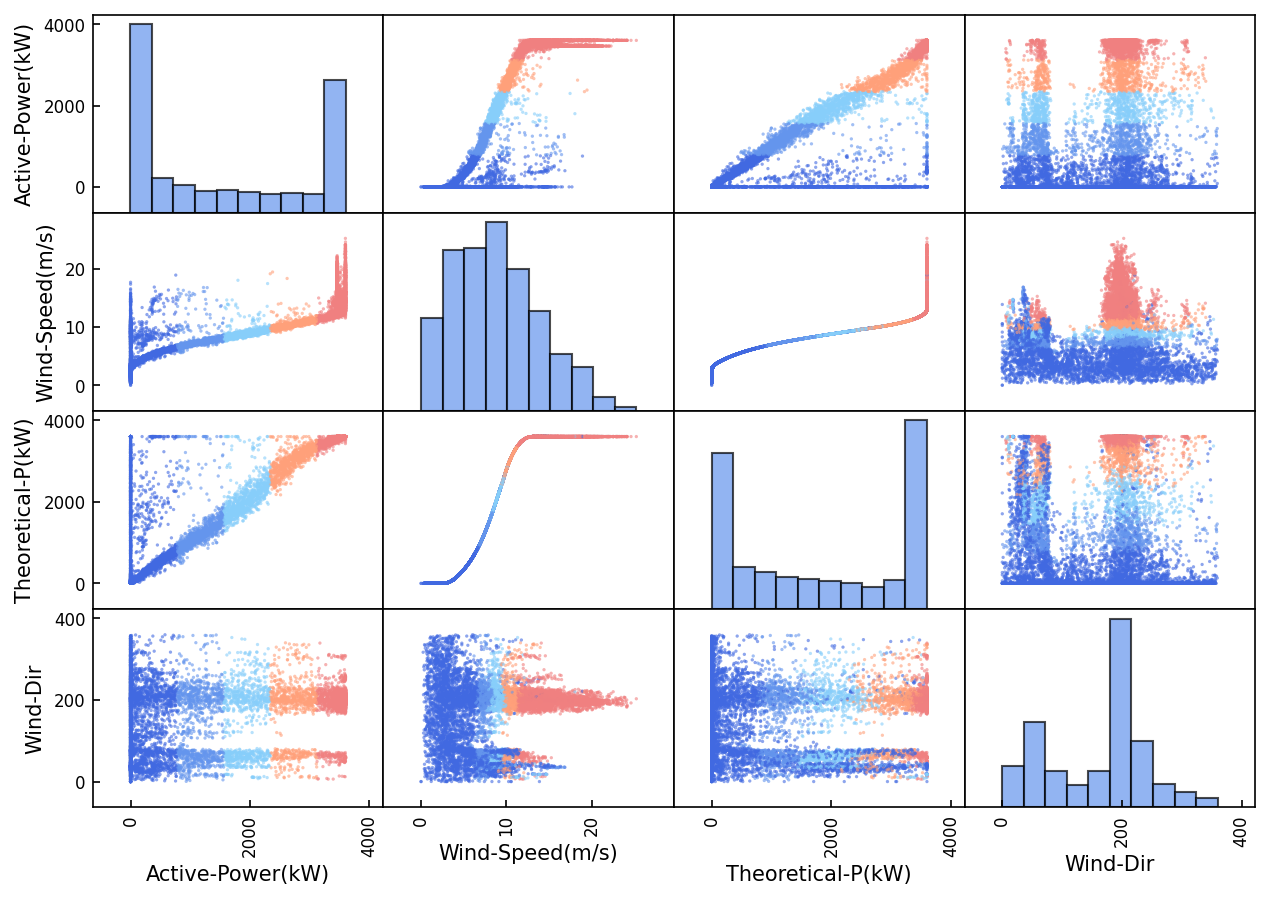

In [18]:
# 散布矩阵和相关性分析
colors=['royalblue', 'cornflowerblue', 'lightskyblue', 'lightsalmon', 'lightcoral']
pd.plotting.scatter_matrix(data_.loc[:,['Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir']],
                           alpha=0.6, figsize=(10,7), s=10,
                           diagonal='hist', hist_kwds={'color': 'cornflowerblue', 'edgecolor': 'black', 'alpha': 0.7},
                           range_padding=0.35, color=data_['Active-Power(kW)'].apply(lambda x : colors[int(x/780)])
                          )  # color=data1['I'].apply(lambda x : colors[x]);;;colors[4]
plt.rcParams['savefig.dpi'] = 200  # 图片像素
plt.rcParams['figure.dpi'] = 150  # 分辨率
plt.rcParams['xtick.direction'] = 'in'  # 设置xtick和ytick的方向：in、out、inout
plt.rcParams['ytick.direction'] = 'in'
plt.show()


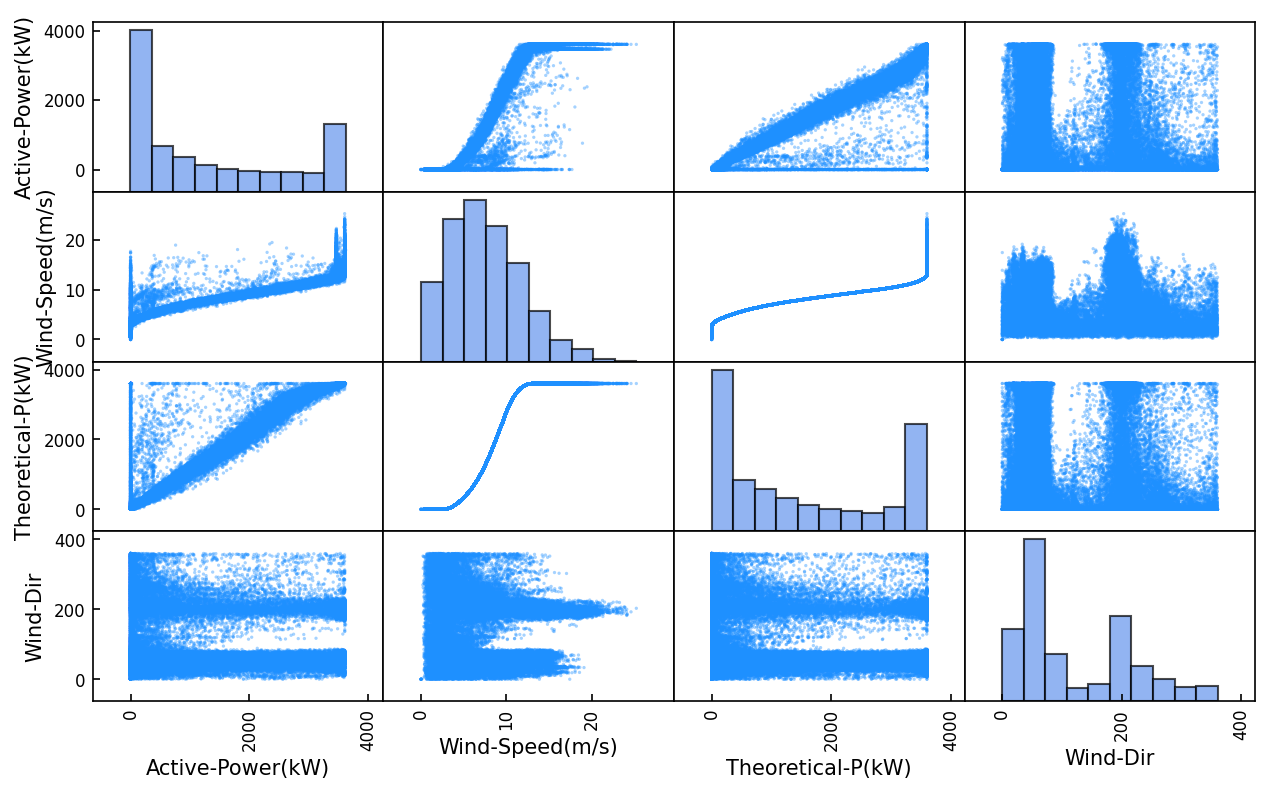

In [19]:
# 散布矩阵和相关性分析
colors=['coral', 'salmon', 'lightcyan', 'orangered', 'dodgerblue']
pd.plotting.scatter_matrix(data.loc[:,['Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir']],
                           alpha=0.4, figsize=(10,6), s=10,
                           diagonal='hist', hist_kwds={'color': 'cornflowerblue', 'edgecolor': 'black', 'alpha': 0.7},
                           range_padding=0.35, color=colors[4])  # color=data1['I'].apply(lambda x : colors[x]);;;colors[4]
plt.rcParams['savefig.dpi'] = 200  # 图片像素
plt.rcParams['figure.dpi'] = 150  # 分辨率
plt.rcParams['xtick.direction'] = 'in'  # 设置xtick和ytick的方向：in、out、inout
plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['axes.labelpad'] = 14
plt.show()
                           

# 季节性散布

In [5]:
data.head(10)

,Date,Active-Power(kW),Wind-Speed(m/s),Theoretical-P(kW),Wind-Dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785


In [4]:
# 按月份切割数据
a_p = pd.DataFrame()
for i in np.array(range(12)):
    a_p[str(i)]=data.iloc[i*6*24*29:(i+1)*6*24*29,1].values
a_p

,0,1,2,3,4,5,6,7,8,9,10,11
0,380.047791,3602.425049,3543.438965,0.000000,0.000000,2651.013916,1067.973999,0.000000,223.919205,1481.727051,3603.073975,3600.434082
1,453.769196,3602.739014,1878.557983,160.827606,0.000000,2659.680908,1112.161987,0.000000,238.311707,1479.456055,3603.288086,3600.542969
2,306.376587,3602.092041,285.655609,165.462799,0.000000,2552.315918,1083.482056,0.000000,342.585602,1233.536987,3603.354980,3600.374023
3,419.645905,3602.476074,81.741623,961.088989,0.000000,2045.550049,888.525208,0.000000,343.905396,1219.068970,3603.191895,3600.152100
4,380.650696,3602.541992,116.363701,482.786591,63.100479,1933.964966,829.155823,0.000000,356.419495,1117.761963,3603.397949,3600.052979
...,...,...,...,...,...,...,...,...,...,...,...,...
4171,3603.023926,3527.047119,0.000000,0.000000,3236.854004,1476.828003,0.000000,52.776711,1395.156006,3602.093994,3600.412109,724.054016
4172,3602.831055,3488.284912,0.000000,0.000000,2926.347900,1001.348022,0.000000,97.112511,1810.885010,3596.356934,3568.322998,727.238525
4173,3602.445068,3484.428955,0.000000,0.000000,2825.024902,630.353577,0.000000,86.994522,1474.530029,3601.780029,3600.440918,886.928284
4174,3602.764893,3521.846924,0.000000,0.000000,2629.183105,823.223877,0.000000,249.765793,1493.302002,3601.104004,3599.964111,824.530029


<function matplotlib.pyplot.show(close=None, block=None)>

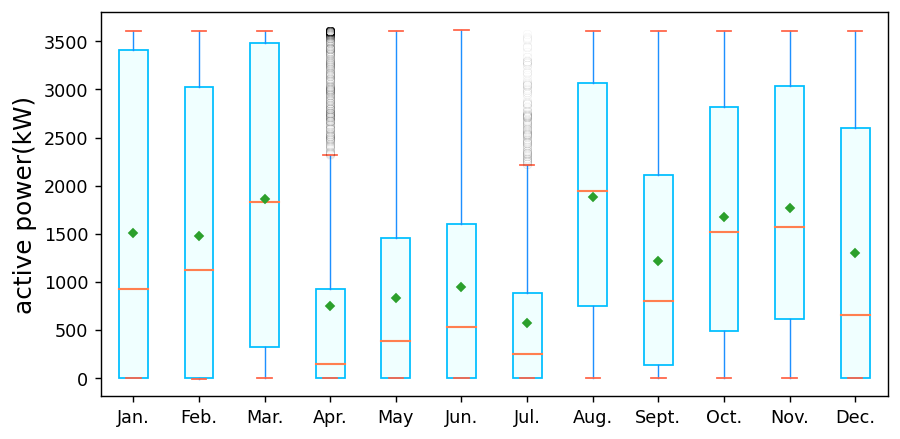

In [28]:
import matplotlib
# 将配置重置为默认值
# matplotlib.rcdefaults()
plt.figure(figsize=(8, 4),dpi=127) # 创建画板
# plt.rcParams['savefig.dpi'] = 300  # 图片像素
# plt.rcParams['figure.dpi'] = 300  # 分辨率

plt.boxplot(a_p,
            widths=0.44,  # 箱体边框宽度
            labels=['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sept.','Oct.','Nov.','Dec.'],
            medianprops=dict(color='coral', linewidth=1.2),  # 中位数线颜色、粗细
            showmeans=True, meanprops={'marker':'D','markersize':3},  # 均值点标记
            showfliers=True, flierprops={'color':'r', 'linewidth':100, 'markeredgewidth':0.01, 'markersize':5},  # 异常值点设置, sym = '*', 'markeredgewidth':标记点轮廓线粗细, 'markersize':标记点大小
            patch_artist=True, boxprops={'color':"#00bfff", 'facecolor':'azure', 'linewidth':1},  # 箱体边框颜色；箱体填充色；箱体框线粗细 lightblue
            showcaps=True, capprops={'color':'tomato', 'linewidth':1},  # 极值线颜色、粗细
            whiskerprops=dict(color='dodgerblue', linewidth=.8))  # 须的颜色、粗细

# plt.title('Examples of boxplot', fontsize=20)  # 标题，并设定字号大小
plt.tick_params(labelsize=10)  # 刻度值大小
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.ylabel('active power(kW)', fontsize=14)
plt.xlabel('', fontsize=14)
plt.rcParams['xtick.direction'] = 'out'  # 设置xtick和ytick的方向：in、out、inout
plt.rcParams['ytick.direction'] = 'out'

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

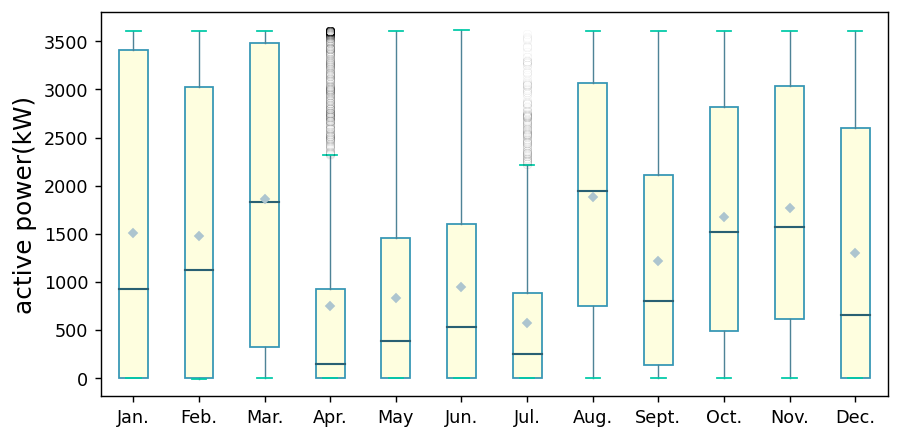

In [95]:
# import matplotlib
# 将配置重置为默认值
# matplotlib.rcdefaults()

colors = ["#3596B5", "#FEFEDF", "#296073", "#ADC5CF", "#4E8397", "#00C9A7"]  # 0箱体边框、1箱体填充、2中位数线、3均值点、4须、5极值线、

plt.figure(figsize=(8, 4),dpi=127) # 创建画板
plt.boxplot(a_p,
            widths=0.44,  # 箱体边框宽度
            labels=['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sept.','Oct.','Nov.','Dec.'],
            patch_artist=True, boxprops={'color':colors[0], 'facecolor':colors[1], 'linewidth':1},  # 箱体边框颜色；箱体填充色；箱体框线粗细 lightblue
            medianprops=dict(color=colors[2], linewidth=1.2),  # 中位数线颜色、粗细
            showmeans=True, meanprops={'color':colors[3], 'markeredgecolor':colors[3], 'markerfacecolor':colors[3], 'marker':'D','markersize':3},  # 均值点标记
            whiskerprops=dict(color=colors[4], linewidth=.8),  # 须的颜色、粗细
            showcaps=True, capprops={'color':colors[5], 'linewidth':1},  # 极值线颜色、粗细
            showfliers=True, flierprops={'color':'b', 'linewidth':100, 'markeredgewidth':0.01, 'markersize':5})  # 异常值点设置, sym = '*', 'markeredgewidth':标记点轮廓线粗细, 'markersize':标记点大小

# plt.title('Examples of boxplot', fontsize=20)  # 标题，并设定字号大小
plt.tick_params(labelsize=10)  # 刻度值大小
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.ylabel('active power(kW)', fontsize=14)  # 设置 y 轴标签文字、大小
plt.xlabel('', fontsize=14)  # 设置 x 轴标签文字、大小
# plt.xticks(rotation=0)
plt.rcParams['xtick.direction'] = 'out'  # 设置xtick方向：in、out、inout
plt.rcParams['ytick.direction'] = 'out'  # 设置ytick方向：in、out、inout
# plt.rcParams['savefig.dpi'] = 300  # 图片像素
# plt.rcParams['figure.dpi'] = 300  # 分辨率

plt.show

In [71]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

# 自相关和偏自相关函数

自相关是序列和自己滞后量的简单相关。如果序列显著自相关，均值和序列之前的值（滞后量）可能对预测当前值有帮助。

偏自相关也会传递相似的信息但是它传递的是序列和它滞后量的纯粹相关，排除了其他中间滞后量对相关的贡献。

In [26]:
data_

,Date,Active-Power(kW),Wind-Speed(m/s),Theoretical-P(kW),Wind-Dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
9995,15 03 2018 21:50,1534.812012,8.258588,1681.372374,224.531296
9996,15 03 2018 22:00,1453.683960,8.142464,1612.604536,221.026993
9997,15 03 2018 22:10,1384.176025,8.162384,1624.313078,219.115799
9998,15 03 2018 22:20,1267.052002,7.918523,1483.688946,217.135193


C:\Users\Administrator\Desktop\env37_1\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


<function matplotlib.pyplot.show(close=None, block=None)>

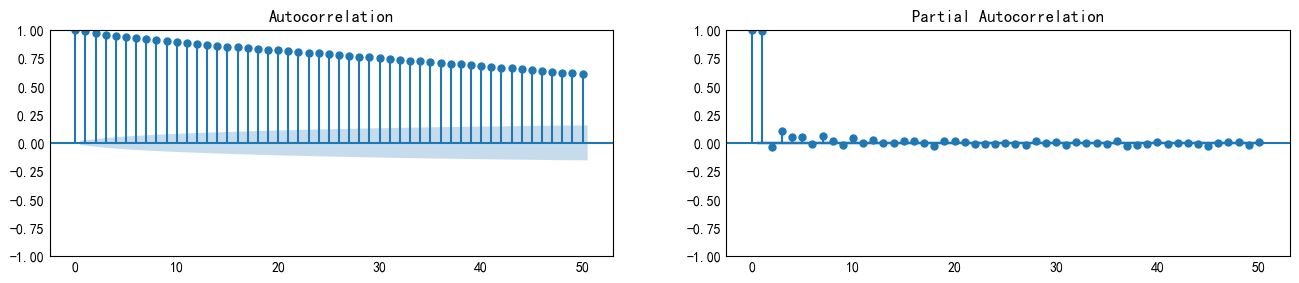

In [35]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(data_['Active-Power(kW)'].values, nlags=50)
# pacf_50 = pacf(data_['Active-Power(kW)'].values, nlags=50)
# print(acf_50, pacf_50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_['Active-Power(kW)'].values, lags=50, ax=axes[0])
plot_pacf(data_['Active-Power(kW)'].values, lags=50, ax=axes[1])
plt.show

In [7]:
data['Active-Power(kW)'].values#.tolist()

array([ 380.0478,  453.7692,  306.3766,  419.6459, ..., 1684.353 ,
       2201.1069, 2515.6941, 2820.4661])

In [8]:
data.loc[:,['Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir']].columns

Index(['Active-Power(kW)', 'Wind-Speed(m/s)', 'Theoretical-P(kW)', 'Wind-Dir'], dtype='object')

In [65]:
X = StandardScaler().fit_transform(data.iloc[:,[1,2,3,4]].values)  # 数据标准化
X.shape

(50530, 4)

In [66]:
X.shape[1]

4

In [67]:
np.corrcoef(X.T)

array([[ 1.    ,  0.9128,  0.9499, -0.0627],
       [ 0.9128,  1.    ,  0.9442, -0.0772],
       [ 0.9499,  0.9442,  1.    , -0.0991],
       [-0.0627, -0.0772, -0.0991,  1.    ]])

In [68]:
np.corrcoef(X.T)[1,2]

0.9442087824669074

In [72]:
range(X.shape[1])

range(0, 4)

In [79]:
np.array(range(X.shape[1]))

array([0, 1, 2, 3])

In [77]:
range(5)

range(0, 5)

In [10]:
data.shape

(50530, 5)

In [11]:
data.head()

,Date,Active-Power(kW),Wind-Speed(m/s),Theoretical-P(kW),Wind-Dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [13]:
data.shape[0]/(6*24)

350.90277777777777

In [89]:
6*24*29*12

50112

In [22]:
data.iloc[:,[1,2]]

,Active-Power(kW),Wind-Speed(m/s)
0,380.047791,5.311336
1,453.769196,5.672167
2,306.376587,5.216037
3,419.645905,5.659674
4,380.650696,5.577941
...,...,...
50525,2963.980957,11.404030
50526,1684.353027,7.332648
50527,2201.106934,8.435358
50528,2515.694092,9.421366


In [68]:
data.iloc[0:6*24+1,0:3]

,Date,Active-Power(kW),Wind-Speed(m/s)
0,01 01 2018 00:00,380.047791,5.311336
1,01 01 2018 00:10,453.769196,5.672167
2,01 01 2018 00:20,306.376587,5.216037
3,01 01 2018 00:30,419.645905,5.659674
4,01 01 2018 00:40,380.650696,5.577941
...,...,...,...
140,01 01 2018 23:20,3441.025879,12.676000
141,01 01 2018 23:30,3373.969971,13.003050
142,01 01 2018 23:40,3369.812988,13.297670
143,01 01 2018 23:50,3375.903076,12.844060


In [61]:
data.iloc[6*24:6*24*2,1]

144    3377.649902
145    3374.423096
146    3401.081055
147    3469.412109
148    3511.809082
          ...     
283    1561.182007
284    1544.999023
285    1456.738037
286    1795.644043
287    2773.291016
Name: Active-Power(kW), Length: 144, dtype: float64

In [69]:
a = pd.DataFrame()
a

""


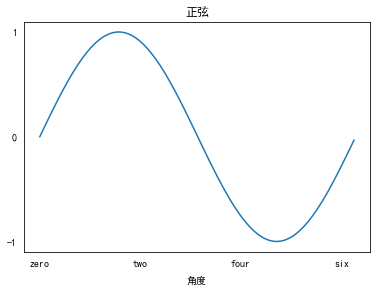

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一(替换sans-serif字体)
plt.rcParams['axes.unicode_minus'] = False

x = np.arange(0, math.pi*2, 0.05)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

y = np.sin(x)

ax.plot(x, y)
ax.set_xlabel('角度',labelpad=8.5)
ax.set_title('正弦')
ax.set_xticks([0,2,4,6])
ax.set_xticklabels(['zero','two','four','six'])
ax.set_yticks([-1,0,1])
plt.show()

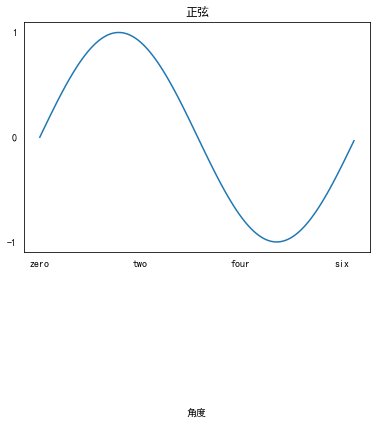

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一(替换sans-serif字体)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelpad'] = 140

x = np.arange(0, math.pi*2, 0.05)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

y = np.sin(x)

ax.plot(x, y)
ax.set_xlabel('角度')
ax.set_title('正弦')
ax.set_xticks([0,2,4,6])
ax.set_xticklabels(['zero','two','four','six'])
ax.set_yticks([-1,0,1])
plt.show()